In [1]:
from rockpool.nn.modules import LIFJax, LinearJax
from rockpool.nn.combinators import Sequential
import numpy as np

/Users/ugurcancakal/rockpool/lib/python3.10/site-packages/jax/_src/lib/__init__.py:33: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


In [2]:
from rockpool.devices.dynapse.dynapsim import DynapSim

In [3]:
N = 10

ds_mod = DynapSim.from_specification(
    (4 * N, N),
)

In [4]:
dse_net = Sequential(
    LinearJax((5, 4*8)),
    DynapSim.from_specification((4*8, 8), dt = 1e-3),
    # LIFJax((4*8))
#     LinearJax((8, 4*10)),
#     DynapSim.from_specification((4*10, 10), dt = 1e-3),
)
dse_net

JaxSequential  with shape (5, 8) {
    LinearJax '0_LinearJax' with shape (5, 32)
    DynapSim '1_DynapSim' with shape (32, 8)
}

In [5]:
dse_net.state()

{'0_LinearJax': {},
 '1_DynapSim': {'iahp': DeviceArray([5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13,
               5.e-13], dtype=float32),
  'iampa': DeviceArray([5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13,
               5.e-13], dtype=float32),
  'igaba': DeviceArray([5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13,
               5.e-13], dtype=float32),
  'imem': DeviceArray([5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13,
               5.e-13], dtype=float32),
  'inmda': DeviceArray([5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13,
               5.e-13], dtype=float32),
  'ishunt': DeviceArray([5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13,
               5.e-13], dtype=float32),
  'spikes': DeviceArray([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
  'timer_ref': DeviceArray([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
  'vmem': DeviceArray([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
  'rng_key': DeviceArray

In [6]:
dse_net[0].weight = np.clip(dse_net[0].weight, 5e-13, np.inf)
dse_net[0].weight

# dse_net[2].weight = np.clip(dse_net[2].weight * 1e-12, -np.inf, np.inf)
# dse_net[2].weight

array([[3.88631872e-01, 7.73026910e-01, 5.00000000e-13, 8.60344193e-01,
        5.00000000e-13, 3.51897605e-01, 5.00000000e-13, 5.00000000e-13,
        5.00000000e-13, 5.00000000e-13, 9.17157421e-01, 3.72749681e-01,
        5.00000000e-13, 1.02968746e-01, 5.00000000e-13, 3.67952481e-01,
        5.00000000e-13, 5.00000000e-13, 1.75205740e-01, 8.44523581e-01,
        3.43392219e-01, 1.72598736e-01, 5.00000000e-13, 5.00000000e-13,
        7.62287488e-01, 1.34383228e-01, 3.48149822e-01, 1.08871471e+00,
        3.32333589e-01, 5.00000000e-13, 5.00000000e-13, 3.51847732e-02],
       [5.00000000e-13, 1.23025723e-01, 5.00000000e-13, 5.00000000e-13,
        2.23067106e-01, 5.00000000e-13, 5.00000000e-13, 5.00000000e-13,
        4.80404744e-04, 5.00000000e-13, 7.16436144e-01, 4.02970150e-01,
        5.00000000e-13, 5.00000000e-13, 2.68380848e-01, 7.18362213e-01,
        4.96473460e-02, 5.00000000e-13, 5.00000000e-13, 5.00000000e-13,
        2.09475323e-01, 5.00000000e-13, 5.55152728e-01, 5.00000

In [7]:
import jax
import matplotlib.pyplot as plt

In [8]:
# jdse_net = jax.jit(dse_net)

In [9]:
import numpy as np

fP = 0.01
T = 1000
dt = 1e-3
spikes = np.random.rand(1, T, 5) < fP

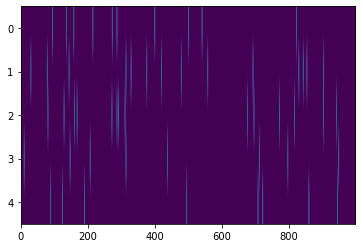

In [10]:
plt.imshow(spikes.T, aspect='auto')

In [11]:
# dse_net[0].w_rec.T.shape

In [12]:
out, state, record_dict = dse_net(spikes)

In [13]:
out.shape

(1, 1000, 8)

In [14]:
record_dict["1_DynapSim"]["imem"]

DeviceArray([[[5.0641240e-13, 4.9631593e-13, 4.9656302e-13, ...,
               4.7289283e-13, 5.1135447e-13, 4.9764316e-13],
              [5.0641240e-13, 4.9631593e-13, 4.9656302e-13, ...,
               4.7289283e-13, 5.1135447e-13, 4.9764316e-13],
              [5.0641240e-13, 4.9631593e-13, 4.9656302e-13, ...,
               4.7289283e-13, 5.1135447e-13, 4.9764316e-13],
              ...,
              [5.0641240e-13, 4.9631593e-13, 4.9656302e-13, ...,
               4.7289283e-13, 5.1135447e-13, 4.9764316e-13],
              [5.0641240e-13, 4.9631593e-13, 4.9656302e-13, ...,
               4.7289283e-13, 5.1135447e-13, 4.9764316e-13],
              [5.0641240e-13, 4.9631593e-13, 4.9656302e-13, ...,
               4.7289283e-13, 5.1135447e-13, 4.9764316e-13]]],            dtype=float32)

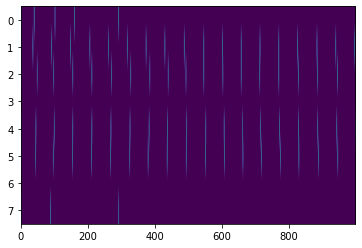

In [15]:
plt.imshow(out.T, aspect = 'auto')

In [16]:
state

{'0_LinearJax': {},
 '1_DynapSim': {'iahp': DeviceArray([[5.0641240e-13, 1.9743323e-09, 7.5331880e-10, 4.9438188e-13,
                7.6016132e-10, 7.3895789e-10, 5.1135447e-13, 4.9764316e-13]],            dtype=float32),
  'iampa': DeviceArray([[1.55028269e-01, 1.26726821e-01, 1.18706815e-01,
                4.94381879e-13, 7.17382953e-02, 3.85386087e-02,
                5.11354468e-13, 4.97643159e-13]], dtype=float32),
  'igaba': DeviceArray([[0.15127583, 0.07288104, 0.00953074, 0.01210798, 0.01113058,
                0.01928964, 0.02811995, 0.10284416]], dtype=float32),
  'imem': DeviceArray([[5.0641240e-13, 4.9631593e-13, 4.9656302e-13, 4.9438188e-13,
                5.0244460e-13, 4.7289283e-13, 5.1135447e-13, 4.9764316e-13]],            dtype=float32),
  'inmda': DeviceArray([[0.06110824, 0.16302368, 0.06612627, 0.01081133, 0.03521227,
                0.12591588, 0.18927939, 0.05855198]], dtype=float32),
  'ishunt': DeviceArray([[5.0641240e-13, 4.9631593e-13, 4.9656302e-13, 1.84

In [17]:
# new_params = devices.dynapse.regen_mismatch(net)
#     # - Iterate through network
#     # Look for DynapSim modules
#     # Generate new mismatched parameters for all DynapSim modules
#     # Return the new parameter dict for the entire network
# net = net.set_attributes(new_params)

In [18]:
# DynapSim(use_mismatch = True, mismatch_scale = 0.05, mismatch_sigma_rule = 2.0)

In [19]:
# net = Sequential(
#     LinearJax((5, 10)),
#     LIFJax((10,)),
#     LinearJax((10, 20)),
#     LIFJax((20,))
# )

# # Train...

# graph = net.as_graph()
# dse_spec = dynapse.mapper(graph)
# Q_dse_spec = dynapse.quantise(dse_spec) # Uses `WeightParameters`

# dsim_net = DynapSim.from_specification(Q_dse_spec)
# dsamna_net = DynapSamna.from_specification(Q_dse_spec)

# # or

# high_level_config = ...
# low_level_hw_config = samna.dynapse.config....

# dse_config = dynapse.config_from_specification(Q_dse_spec)

# dsim_net = DynapSim(high_level_config)
# dsim_net = DynapSim(low_level_hw_config)

# hdk_device = dynapse.find_dynapse_hdks()[0]

# dsamna_net = DynapSamna(low_level_hw_config: samna.dynapse.config.DynapSE2Configuration, hdk_device, dt = 1e-3)
# dsamna_net = DynapSamna(high_level_config: rockpoo.devices.dynapse.config..., hdk_device, dt = 1e-3)